In [2]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\manil\OneDrive\Desktop\manil\PROJECT 3\market mix model\mmm\market-mix-model\mmm_dataset.csv')
df

,Date,TikTok,Facebook,Google Ads,Sales
0,01-07-2018,13528.10,0.00,0.00,9779.80
1,1/14/2018,0.00,5349.65,2218.93,13245.19
2,1/21/2018,0.00,4235.86,2046.96,12022.66
3,1/28/2018,0.00,3562.21,0.00,8846.95
4,02-04-2018,0.00,0.00,2187.29,9797.07
...,...,...,...,...,...
195,10-03-2021,0.00,0.00,1691.68,9030.17
196,10-10-2021,11543.58,4615.35,2518.88,15904.11
197,10/17/2021,0.00,4556.16,1919.19,12839.29
198,10/24/2021,0.00,0.00,1707.65,9063.45


In [3]:
n = len(df)
n

200

In [4]:
date = df['Date']
x1= df['TikTok']
x2 = df['Facebook']
x3 = df['Google Ads']
y = df['Sales']

In [5]:
sum_x1 = sum(x1)
sum_x2 = sum(x2)
sum_x3 = sum(x3)
sum_y = sum(y)

In [6]:
print(" sum of x1 values :  ",sum_x1)
print(" sum of x2 values :  ",sum_x2)
print(" sum of x3 values :  ",sum_x3)



 sum of x1 values :   589241.53
 sum of x2 values :   442717.00999999995
 sum of x3 values :   304144.5100000002


In [7]:
sqrd_x1 = x1.pow(2)
sqrd_x2 = x2.pow(2)
sqrd_x3 = x3.pow(2)

In [8]:
sum_sqrd_x1 = sum(sqrd_x1)
sum_sqrd_x2 = sum(sqrd_x2)
sum_sqrd_x3 = sum(sqrd_x3)

In [9]:
print(" sum of squred value of x1 : ",sum_sqrd_x1)
print(" sum of squred value of x2 : " ,sum_sqrd_x2)
print(" sum of squred value of x13: ",sum_sqrd_x3)

 sum of squred value of x1 :  6225297906.842701
 sum of squred value of x2 :  2229686889.2043
 sum of squred value of x13:  613407296.1247003


In [10]:
x1_x2 = x1 * x2 
x1_x3 = x1 * x3 
x2_x3 = x2 * x3

In [11]:
sum_x1_x2 = sum(x1_x2)
sum_x1_x3 = sum(x1_x3)
sum_x2_x3 = sum(x2_x3)

In [12]:
print(" sum of x1 * x2 : ",sum_x1_x2)
print(" sum of x1 * x3 : ",sum_x1_x3)
print(" sum of x2 * x3 : ",sum_x2_x3)

 sum of x1 * x2 :  1503600398.8225
 sum of x1 * x3 :  913961314.1338001
 sum of x2 * x3 :  629414994.4983001


In [13]:
x1_y = x1 * y
x2_y = x2 * y 
x3_y = x3 * y

In [14]:
sum_x1_y = sum(x1_y)
sum_x2_y = sum(x2_y)
sum_x3_y = sum(x3_y)

In [15]:
print("sum of x1 * y : ",sum_x1_y)
print("sum of x2 * y : ",sum_x2_y)
print("sum of x3 * y : ",sum_x3_y)

sum of x1 * y :  8019887854.614502
sum of x2 * y :  5351606990.755799
sum of x3 * y :  3413152406.5068974


In [16]:
sigm_x1_sqrd= sum_sqrd_x1 - ((sum_x1**2)/n)
sigm_x1_sqrd

4489270003.458997

In [17]:
sigm_x2_sqrd = sum_sqrd_x2 -((sum_x2 ** 2)/n)
sigm_x2_sqrd

1249695134.4875996

In [18]:
sigm_x3_sqrd = sum_sqrd_x3 -((sum_x3 ** 2)/n)
sigm_x3_sqrd

150887881.30899924

In [19]:
sigm_x1_x2 = sum_x1_x2 - ((sum_x1 * sum_x2)/n)
sigm_x1_x2

199264157.17537355

In [20]:
sigm_x1_x3 = sum_x1_x3 - ((sum_x1 * sum_x3)/n)
sigm_x1_x3

17888432.066298008

In [21]:
sigm_x2_x3 = sum_x2_x3 - ((sum_x2 * sum_x3)/n)
sigm_x2_x3

-43834745.877275825

In [22]:
sigm_x1_y = sum_x1_y - ((sum_x1 * sum_y)/n)
sigm_x1_y

1733775834.8980055

In [23]:
sigm_x2_y = sum_x2_y - ((sum_x2 * sum_y)/n)
sigm_x2_y

628639283.6188841

In [24]:
sigm_x3_y = sum_x3_y - ((sum_x3 * sum_y)/n)
sigm_x3_y

168495737.3787303

In [25]:
def get_minor(matrix, i, j):
    return [row[:j] + row[j+1:] for row in (matrix[:i]+matrix[i+1:])]

def determinant(matrix):
    if len(matrix) == 1:
        return matrix[0][0]
    elif len(matrix) == 2:
        return matrix[0][0]*matrix[1][1] - matrix[0][1]*matrix[1][0]
    else:
        det = 0
        for j in range(len(matrix)):
            det += ((-1)**j) * matrix[0][j] * determinant(get_minor(matrix, 0, j))
        return det

def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def cofactor(matrix):
    return [[((-1) ** (i + j)) * determinant(get_minor(matrix, i, j)) for j in range(len(matrix))] for i in range(len(matrix))]

def adjugate(matrix):
    cofactors = cofactor(matrix)
    return transpose(cofactors)

def scalar_multiply(matrix, scalar):
    return [[scalar * matrix[i][j] for j in range(len(matrix[0]))] for i in range(len(matrix))]

def matrix_multiply(matrix1, matrix2):
    if len(matrix1[0]) != len(matrix2):
        raise ValueError("Matrix dimensions incompatible for multiplication")
    result = [[0] * len(matrix2[0]) for _ in range(len(matrix1))]
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

# Example matrix
matrix = [
          [sigm_x1_sqrd , sigm_x1_x2, sigm_x1_x3 ],
          [sigm_x1_x2 , sigm_x2_sqrd , sigm_x2_x3],
          [sigm_x1_x3, sigm_x2_x3 , sigm_x3_sqrd]
]

print("values of matrix : " , matrix)
# Calculate determinant
det = determinant(matrix)
print("determinate : ",det)

# Calculate adjugate
adj = adjugate(matrix)
print("adjoint matrix : ", adj)

# Calculate 1/det
inv_det = 1 / det
print("inverse det : " ,inv_det)

# 1 x 3 matrix
vector = [[sigm_x1_y],
          [sigm_x2_y],
          [sigm_x3_y]]

print(" vector : ",vector )

# Perform the operation
result = scalar_multiply(adj, inv_det)
result = matrix_multiply(result, vector)

# Print the result
print("Regression Coefficients:")
print("b1:", result[0][0])
print("b2:", result[1][0])
print("b3:", result[2][0])


values of matrix :  [[4489270003.458997, 199264157.17537355, 17888432.066298008], [199264157.17537355, 1249695134.4875996, -43834745.877275825], [17888432.066298008, -43834745.877275825, 150887881.30899924]]
determinate :  8.311843934185646e+26
adjoint matrix :  [[1.8664236617887344e+17, -3.085068137078462e+16, -3.1089780209096628e+16], [-3.085068137078462e+16, 6.770564434441811e+17, 2.0035053311498208e+17], [-3.1089780209096628e+16, 2.0035053311498208e+17, 5.570512676389026e+18]]
inverse det :  1.2031024739132991e-27
 vector :  [[1733775834.8980055], [628639283.6188841], [168495737.3787303]]
Regression Coefficients:
b1: 0.35968382098965346
b2: 0.488332463591538
b3: 1.215919301372198


In [26]:
b1 = result[0][0]
b2 = result[1][0]
b3 = result[2][0]


In [27]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

correlation_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Date    TikTok  Facebook  Google Ads     Sales
Date        1.000000  0.064813  0.064952   -0.039955  0.047973
TikTok      0.064813  1.000000  0.084128    0.021735  0.679205
Facebook    0.064952  0.084128  1.000000   -0.100946  0.466762
Google Ads -0.039955  0.021735 -0.100946    1.000000  0.360046
Sales       0.047973  0.679205  0.466762    0.360046  1.000000


In [28]:
y_mean = y.mean()
x1_mean = x1.mean()
x2_mean = x2.mean()
x3_mean = x3.mean()

In [29]:
intercept = y_mean - (b1 * x1_mean) -(b2 * x2_mean) -(b3 * x3_mean)
intercept

6678.396933606206

In [30]:
df.corr()['Sales']

Date          0.047973
TikTok        0.679205
Facebook      0.466762
Google Ads    0.360046
Sales         1.000000
Name: Sales, dtype: float64

In [31]:
# Define a function to plot a line graph
def plot_line(x_values, y_values, x_label, y_label):
    print("Line Plot:")
    for x, y in zip(x_values, y_values):
        print(f"{x_label}: {x}, {y_label}: {y}")

# Example data
dates = ['01-07-2018', '1/14/2018', '1/21/2018', '1/28/2018', '02-04-2018',
         '10-03-2021', '10-10-2021', '10/17/2021', '10/24/2021', '10/31/2021']
sales = [9779.80, 13245.19, 12022.66, 8846.95, 9797.07, 9030.17, 15904.11, 12839.29, 9063.45, 7250.21]

# Plot the line graph
plot_line(dates, sales, 'Date', 'Sales')


Line Plot:
Date: 01-07-2018, Sales: 9779.8
Date: 1/14/2018, Sales: 13245.19
Date: 1/21/2018, Sales: 12022.66
Date: 1/28/2018, Sales: 8846.95
Date: 02-04-2018, Sales: 9797.07
Date: 10-03-2021, Sales: 9030.17
Date: 10-10-2021, Sales: 15904.11
Date: 10/17/2021, Sales: 12839.29
Date: 10/24/2021, Sales: 9063.45
Date: 10/31/2021, Sales: 7250.21


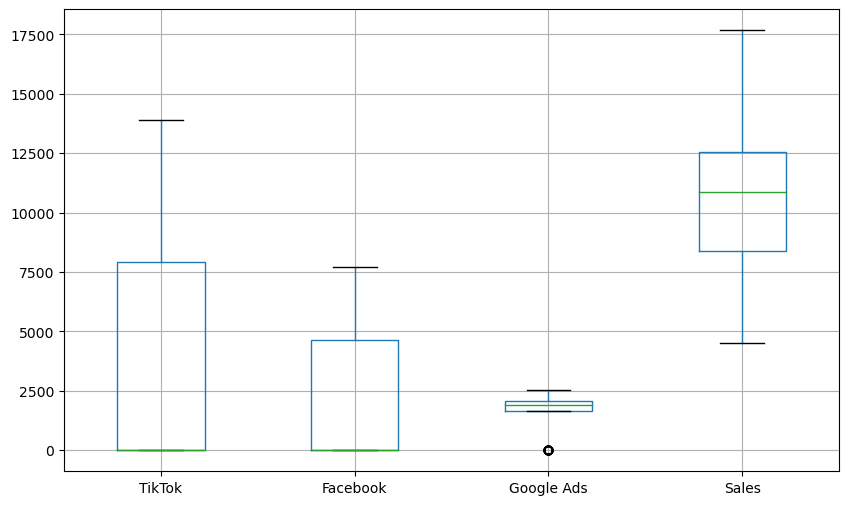

In [32]:
import matplotlib.pyplot as plt
import plotly.express as px  # Add this line to import Plotly Express

fig, axes = plt.subplots(figsize=(10, 6))
df.boxplot(column=['TikTok', 'Facebook', 'Google Ads', 'Sales'])

figure = px.line(df, x='Date', y=df.columns)
figure.show()


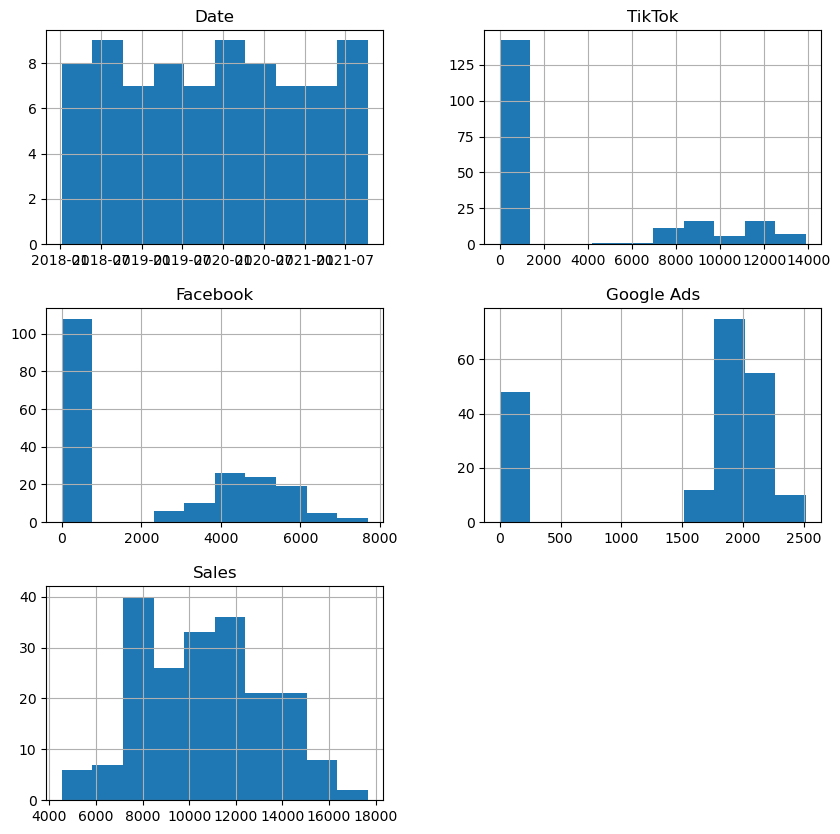

In [33]:
df.hist(figsize=(10,10))
plt.show()

In [34]:
percentile25 = df['Google Ads'].quantile(0.25)
percentile75 = df['Google Ads'].quantile(0.75)

In [35]:
print(percentile25)
print(percentile75)

1657.195
2069.7675


In [36]:
iqr = percentile75-percentile25
iqr

412.5725

In [37]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)

2688.62625
1038.3362499999998


In [38]:
print(df[df['Google Ads'] >upper_limit])

Empty DataFrame
Columns: [Date, TikTok, Facebook, Google Ads, Sales]
Index: []


In [39]:
print(df[df['Google Ads']  < lower_limit])

          Date    TikTok  Facebook  Google Ads     Sales
0   2018-01-07  13528.10      0.00         0.0   9779.80
3          NaT      0.00   3562.21         0.0   8846.95
10         NaT      0.00   4520.34         0.0   8640.44
11         NaT      0.00      0.00         0.0   4960.26
12  2018-04-01  11522.08   5698.46         0.0  12726.46
13  2018-04-08  10243.35      0.00         0.0  11421.71
23         NaT   8515.67   4006.88         0.0  11093.55
24         NaT      0.00      0.00         0.0   8170.63
25  2018-07-01      0.00      0.00         0.0   6542.71
29         NaT      0.00   3429.38         0.0  10634.31
31  2018-08-12      0.00   5880.18         0.0   9151.20
33         NaT      0.00   5387.28         0.0   7399.92
34  2018-09-02   9304.18   2744.44         0.0  10893.16
42         NaT   6587.46   5567.29         0.0  12235.08
43  2018-11-04  13901.55      0.00         0.0  11895.78
44  2018-11-11      0.00      0.00         0.0  10047.41
46         NaT      0.00   4708

In [40]:
new_df = df[df['Google Ads'] < upper_limit]
print(new_df)
new_df.shape

          Date    TikTok  Facebook  Google Ads     Sales
0   2018-01-07  13528.10      0.00        0.00   9779.80
1          NaT      0.00   5349.65     2218.93  13245.19
2          NaT      0.00   4235.86     2046.96  12022.66
3          NaT      0.00   3562.21        0.00   8846.95
4   2018-02-04      0.00      0.00     2187.29   9797.07
..         ...       ...       ...         ...       ...
195 2021-10-03      0.00      0.00     1691.68   9030.17
196 2021-10-10  11543.58   4615.35     2518.88  15904.11
197        NaT      0.00   4556.16     1919.19  12839.29
198        NaT      0.00      0.00     1707.65   9063.45
199        NaT      0.00      0.00     1863.31   7250.21

[200 rows x 5 columns]


(200, 5)

In [41]:
import seaborn as sns

C:\Users\manil\AppData\Local\Temp\ipykernel_8468\22313493.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\manil\AppData\Local\Temp\ipykernel_8468\22313493.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




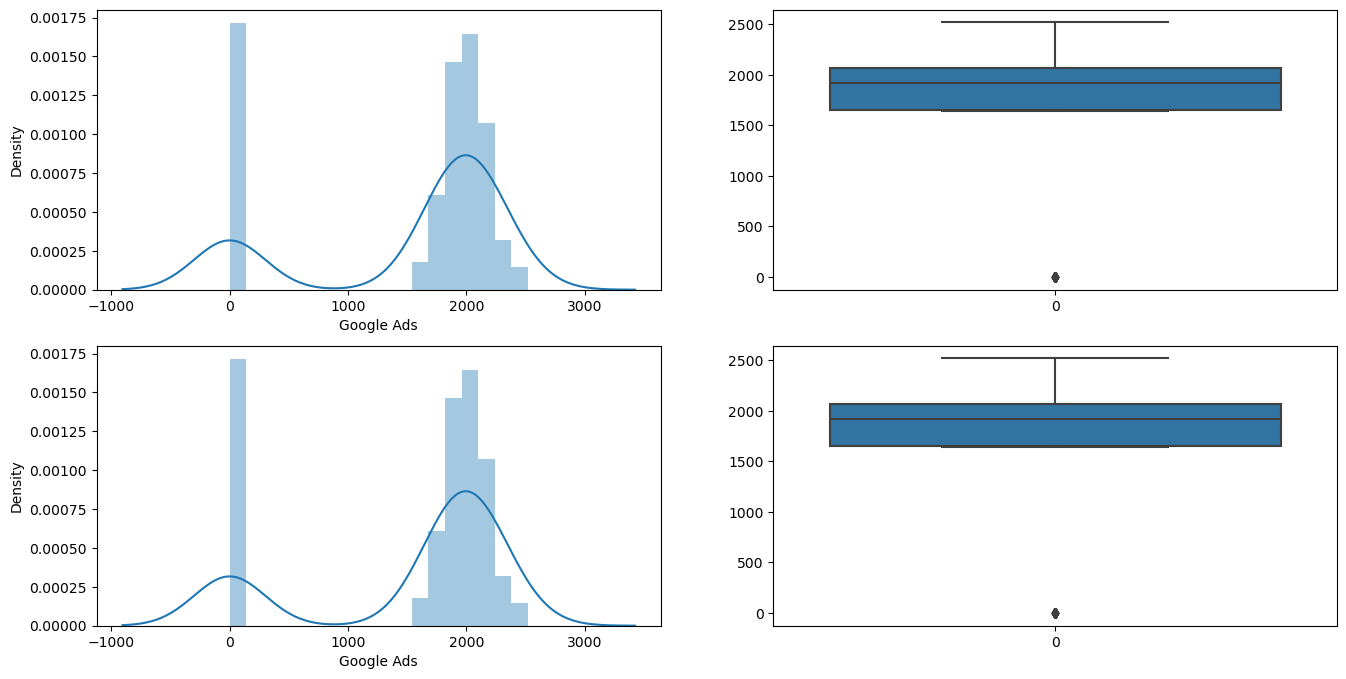

In [42]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Google Ads'])
plt.subplot(2,2,2)
sns.boxplot(df['Google Ads'])
plt.subplot(2,2,3)
sns.distplot(new_df['Google Ads'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Google Ads'])
plt.show()

In [43]:
import numpy as np

In [44]:
df1 = df.copy()
df1['Google Ads'] = np.where(
    df1['Google Ads'] > upper_limit,upper_limit,
    np.where(
        df1['Google Ads'] < lower_limit,
        lower_limit,
      df1['Google Ads']  
    )
)

In [45]:
df1

,Date,TikTok,Facebook,Google Ads,Sales
0,2018-01-07,13528.10,0.00,1038.33625,9779.80
1,NaT,0.00,5349.65,2218.93000,13245.19
2,NaT,0.00,4235.86,2046.96000,12022.66
3,NaT,0.00,3562.21,1038.33625,8846.95
4,2018-02-04,0.00,0.00,2187.29000,9797.07
...,...,...,...,...,...
195,2021-10-03,0.00,0.00,1691.68000,9030.17
196,2021-10-10,11543.58,4615.35,2518.88000,15904.11
197,NaT,0.00,4556.16,1919.19000,12839.29
198,NaT,0.00,0.00,1707.65000,9063.45


In [46]:
figure = px.line(df, x='Date' ,y=df.columns)
figure.show()

In [47]:
#import the sklearn mutliple linear regression

In [48]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [49]:
df.describe()

,Date,TikTok,Facebook,Google Ads,Sales
count,79,200.000000,200.000000,200.000000,200.000000
mean,2019-11-22 01:12:54.683544320,2946.207650,2213.585050,1520.722550,10668.141500
min,2018-01-07 00:00:00,0.000000,0.000000,0.000000,4532.330000
25%,2018-12-05 12:00:00,0.000000,0.000000,1657.195000,8396.942500
50%,2019-12-01 00:00:00,0.000000,0.000000,1918.990000,10853.105000
75%,2020-10-21 12:00:00,7938.527500,4624.027500,2069.767500,12566.995000
max,2021-10-10 00:00:00,13901.550000,7696.220000,2518.880000,17668.340000
std,NaN,4749.646908,2505.967886,870.764354,2700.706683


In [50]:
df.isnull().sum()

Date          121
TikTok          0
Facebook        0
Google Ads      0
Sales           0
dtype: int64

<Axes: >

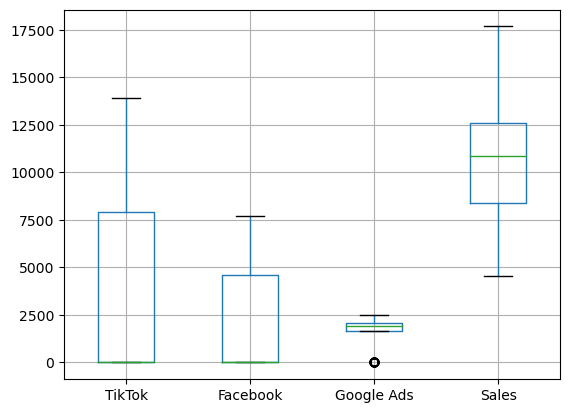

In [51]:
df.boxplot(column=['TikTok' , 'Facebook' , 'Google Ads' , 'Sales'])

In [52]:
figure = px.line(df , x='Date' , y=df.columns)
figure.show()

In [53]:
inputs = ['TikTok' , 'Facebook' , 'Google Ads']
x = df[inputs]
y = df['Sales']

x=sm.add_constant(x)
result = sm.OLS(y,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     234.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.28e-64
Time:                        22:39:03   Log-Likelihood:                -1711.1
No. Observations:                 200   AIC:                             3430.
Df Residuals:                     196   BIC:                             3443.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6678.3969    209.575     31.866      0.0

In [54]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.3 )

model = LinearRegression()

model.fit(x_train , y_train)

print(
    model.score(x_train,y_train),
    model.score(x_test,y_test)
)

0.7895602809604049 0.7602787255227942


In [55]:
model.coef_

array([0.        , 0.35635763, 0.48127475, 1.32545808])

In [56]:
x.columns

Index(['const', 'TikTok', 'Facebook', 'Google Ads'], dtype='object')

In [57]:
model.intercept_

6464.040370660619

In [58]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y', errors='coerce')

In [59]:
df.corr()

,Date,TikTok,Facebook,Google Ads,Sales
Date,1.000000,0.064813,0.064952,-0.039955,0.047973
TikTok,0.064813,1.000000,0.084128,0.021735,0.679205
Facebook,0.064952,0.084128,1.000000,-0.100946,0.466762
Google Ads,-0.039955,0.021735,-0.100946,1.000000,0.360046
Sales,0.047973,0.679205,0.466762,0.360046,1.000000


In [60]:
df.corr()['Sales']

Date          0.047973
TikTok        0.679205
Facebook      0.466762
Google Ads    0.360046
Sales         1.000000
Name: Sales, dtype: float64

In [61]:
date = df['Date']
x1= df['TikTok']
x2 = df['Facebook']
x3 = df['Google Ads']
y = df['Sales']

In [62]:
fig1 = px.scatter(df, x='TikTok', y='Sales')
fig2 = px.scatter(df, x='Facebook', y='Sales')
fig3 = px.scatter(df, x='Google Ads', y='Sales')

fig1.show()
fig2.show()
fig3.show()


In [63]:
fig = px.scatter(df, color='TikTok', x='Date', y='Sales')
fig.show()

In [64]:
fig = px.scatter(df, color='Facebook', x='Date', y='Sales')
fig.show()

In [65]:
fig = px.scatter(df, color='Google Ads', x='Date', y='Sales')
fig.show()